# Supervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

### k-nearest neighbors (k-NN)

The k -NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In the next graph, we added three new data points, shown as stars. For each of them, we marked the closest point in the training set. The prediction of the one-nearest-neighbor algorithm is the label of that point.

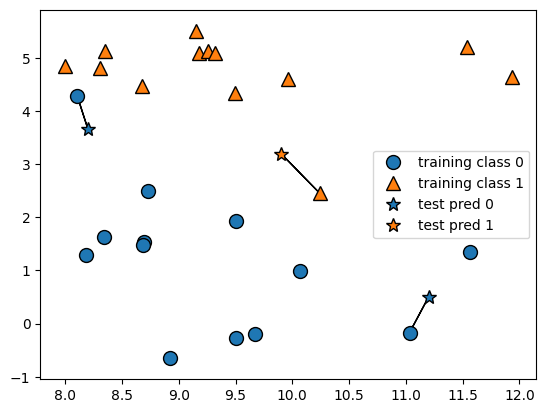

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

When considering more than one neighbor, we use voting to assign a label.This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent: in other words, the majority class among the k -nearest neighbors.

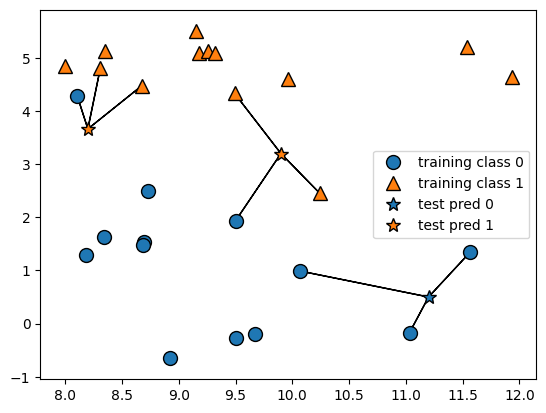

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### Applying scikit-learn to k-Neighbors classification

In [16]:
#  split our data into a training and a test set in order to evaluate generalzation performance

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [17]:
# Next, we import and instantiate the class. This is when we can set parameters, like the
# number of neighbors to use.

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) 

In [18]:
# Now, we fit the classifier using the training set.
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# testing our model

y_pred = clf.predict(X_test)

print(f'Test set prediction: {y_pred}')
print(f'Test set original: {y_test}')

Test set prediction: [1 0 1 0 1 0 0]
Test set original: [1 0 1 0 1 1 0]


In [23]:
# Let's evaluate how well our model generalizes

print(f'Test set accuracy: {clf.score(X_test, y_test)}')

Test set accuracy: 0.8571428571428571


We see that our model is about 86% accurate, meaning the model predicted the class
correctly for 86% of the samples in the test dataset.

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary , which is the divide between where the algorithm assigns class 0 versus where it assigns class 1

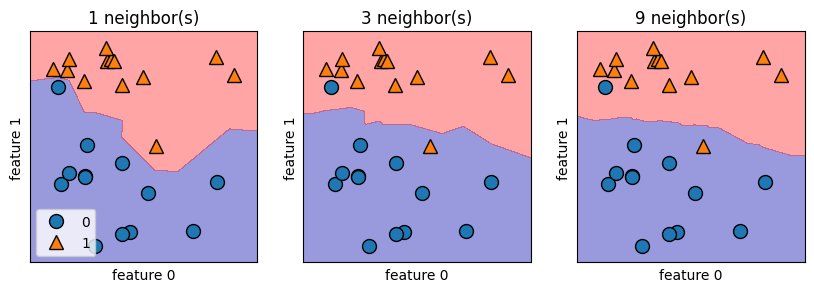

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### Real case
Breast Cancer dataset

In [26]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(f"cancer.keys():\n {cancer.keys()}")

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [30]:
print(f'Feature names: \n {cancer.DESCR}')

Feature names: 
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Wors

In [31]:
print("Shape of cancer data:", cancer.data.shape) # (569, 30)

Shape of cancer data: (569, 30)


In [32]:
print(f'Levels: \n {cancer.target_names}')

Levels: 
 ['malignant' 'benign']


In [33]:
print(f'Feature names: \n {cancer.feature_names}')

Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target,random_state=66)

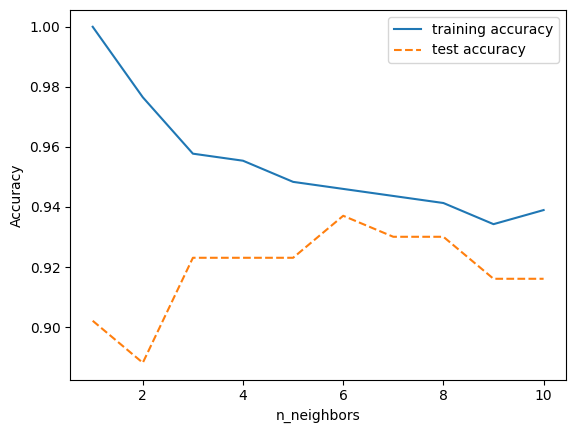

In [42]:
training_accuracy = []
test_accuracy = []

for i in range(1,11):
    clf = KNeighborsClassifier(n_neighbors= i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train)) #record training set accuracy
    test_accuracy.append(clf.score(X_test,y_test)) #record generalization accuracy

plt.plot(range(1,11), training_accuracy, label = 'training accuracy')
plt.plot(range(1,11), test_accuracy, label = 'test accuracy',linestyle = '--')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In this plot we can recognize some of the characteristics of overfitting and underfitting. Si se considera un único vecino más cercano, la predicción en el conjunto de entrenamiento es perfecta. Pero cuando se consideran más vecinos, el modelo se vuelve más simple y la precisión del entrenamiento disminuye. La precisión del conjunto de prueba para el uso de un único vecino es menor que cuando se utilizan más vecinos, lo que indica que el uso del único vecino más cercano conduce a un modelo demasiado complejo. note that because considering fewer neighbors corresponds to a more complex model.